# 특성 공학과 규제
* 여러 특성을 사용한 다중 회귀에 대한 이해 및 사이킷런 변환기 사용
* 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀에 대한 이해

### 지난 시간에

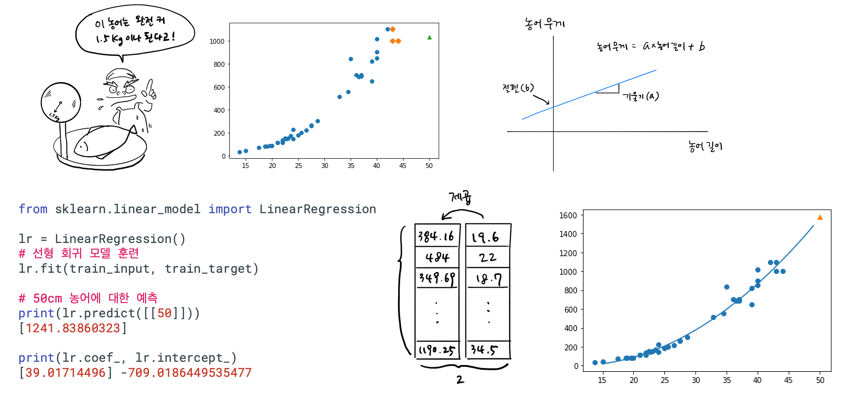

### 과소적합은 아직 그대로... 
* 다항 회귀의 차수를 계속 올려야 할까?
* 가지고 있는 데이터를 충분히 활용하고 있을까?
  - 제공 받은 데이터 : 농어의 길이, 높이, 두께
  - 훈련에 사용한 데이터 : 농어의 길이

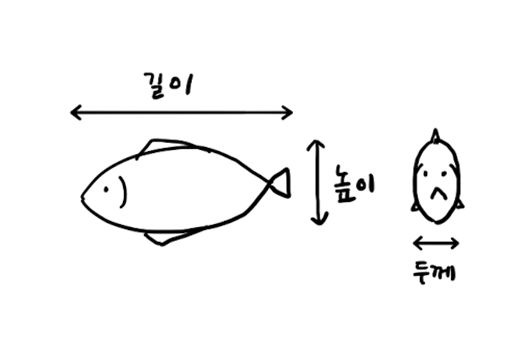

### 다중 회귀(multiple regression)
* 여러 개의 특성을 사용한 선형 회귀
---
#### [선형 회귀와 다중 회귀의 비교]
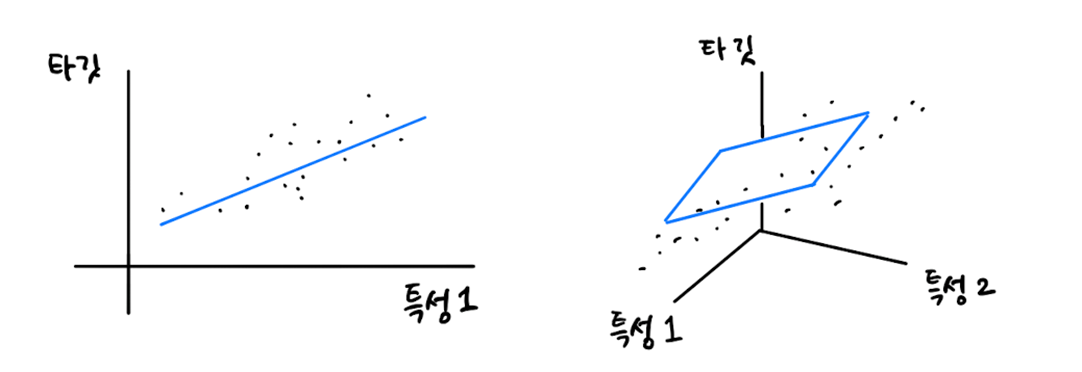

#### [특성 공학(feature engineering)]
* 기존의 특성을 사용하여 새로운 특성을 만들어내는 작업

### 데이터 준비

* 농어의 특성 데이터(길이, 높이, 두께) 준비
  - [CSV 파일 다운로드]https://bit.ly/perch_csv_data
  - 판다스의 read_csv() 함수를 통해 농어 데이터를 읽어 데이터프레임에 저장
  - to_numpy() 함수로 넘파이 배열로 변환
 
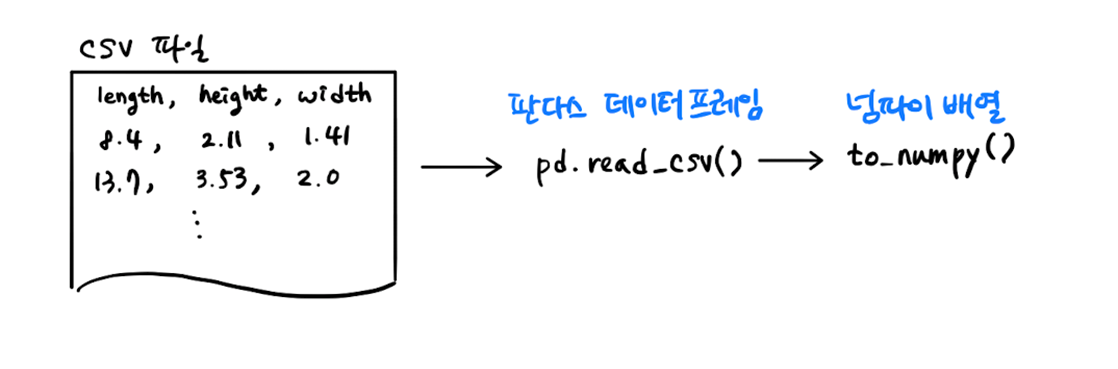

In [116]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [117]:
perch_full[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

* 농어의 타깃 데이터(무게) 준비
  - [코드 복사]http://bit.ly/perch_data

In [119]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

* 훈련 세트와 테스트 세트 생성

In [121]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

### 사이킷런 변환기(scikit-learn transformer)를 이용한 다항 특성 만들기
* 특성을 만들거나 전처리하기 위한 사이킷런 라이브리러 제공 클래스
* fit(), transform() 메서드 제공

#### [PolynomialFeatures 클래스]
* 사이킷런(scikit-learn)의 전처리 도구 중 하나로, **다항 특성(polynomial features)** 을 생성해주는 변환기
* 선형 회귀 모델을 다중 회귀로 확장할 때 자주 사용
* 비선형 관계를 모델링할 수 있도록 입력 특성(변수)을 다항식 형태로 확장
  - (예) 단순한 x 특성으로부터 x², x³ 같은 고차 항을 생성
* 기본적으로 **각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가**

---
* 기본 사용법

```python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X) # fit(), transform()을 동시에 수행
```
* 설명
  - degree=2: 2차 다항식까지 생성
  - include_bias=True: 절편 항(constant term, 1)을 포함
  - fit_transform(X): 입력 데이터 X를 다항 특성으로 변환


* 예시

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly = PolynomialFeatures()
# 2개의 특성 2와 3으로 이루어진 샘플을 변환기에 넣고 적용
poly.fit([[2,3]])
x_poly = poly.transform([[2,3]])
x_poly

# 원본 데이터 : 2, 3
# 제곱항 : 4, 9
# 특성끼리 곱한 항 : 6
# 선형 방정식의 절편향 : 1

array([[1., 2., 3., 4., 6., 9.]])

* include_bias=False: 절편 항(constant term, 1)을 제외

In [129]:
poly = PolynomialFeatures(include_bias=False)
# 2개의 특성 2와 3으로 이루어진 샘플을 변환기에 넣고 적용
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

---
* 농어 훈련 세트를 PolynomialFeatures 변환기에 넣고 특성의 개수 확장

In [131]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [132]:
train_poly.shape

# 3개의 특성이 => 9개의 특성으로 확장
# 길이, 높이, 두께, 길이^2, 높이^2, 두계^2, 길이X높이, 높이X두께, 두계X길이

(42, 9)

* 생성된 특성이 어떤 입력의 조합으로 만들어졌는지 확인

In [134]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

* 테스트 세트 변환

In [136]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기
* 선형 회귀 모델 훈련 방식과 동일

In [138]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982125

In [139]:
print(lr.score(test_poly, test_target))

0.9714559911594155


* 특성의 개수를 추가 : 5제곱까지 특성을 만들어 출력

In [141]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [142]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999938143

In [143]:
lr.score(test_poly, test_target)

-144.40744532797535

* 테스트 세트의 점수가 음수가 나온 이유는 무엇일까?
  * 특성의 개수를 늘리면 선형 모델의 정확도가 올라가지만 훈련 세트에 너무 과대적합되는 문제 발생

### 규제(Regularization)

* **과적합(overfitting)을 방지** 하기 위한 핵심 기법 중 하나
* 모델이 훈련 데이터에 너무 복잡하게 맞춰져 일반화 성능이 떨어질 때, 규제를 통해 모델 복잡도를 조절
* 선형 회귀 모델의 경우 특성이 곱해지는 계수(또는 기울기)의 크기를 줄임

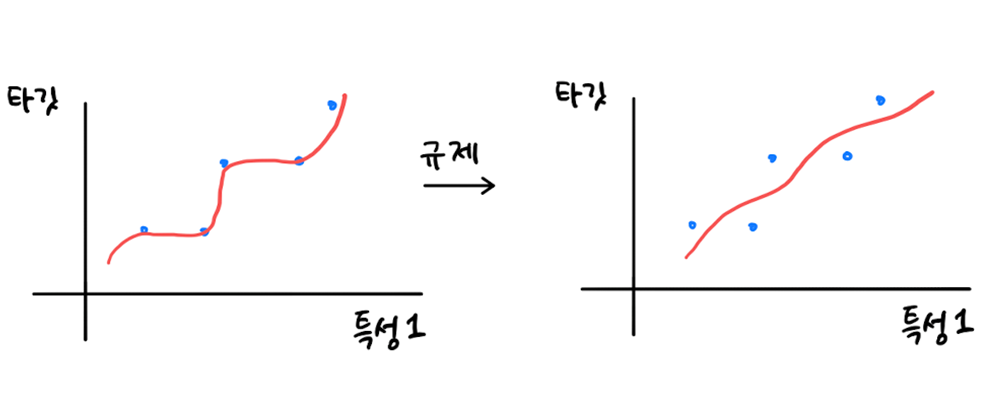

#### [규제 전에 표준화]
* 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이 발생
* 규제를 적용하기 전 먼저 정규화 필요
* 사이킷런에서 제공하는 **StandardScaler 클래스** 를 사용하여 쉽게 표준화 가능

In [148]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [149]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [150]:
ss.mean_ # 훈련 세트에서 학습한 평균 (55개)

array([2.84452381e+01, 8.04238095e+00, 4.82047619e+00, 8.85315000e+02,
       2.53486881e+02, 1.51959000e+02, 7.29365000e+01, 4.36999452e+01,
       2.62868381e+01, 2.97326070e+04, 8.59817581e+03, 5.15200651e+03,
       2.49680043e+03, 1.49567194e+03, 8.99184494e+02, 7.27945149e+02,
       4.36019840e+02, 2.62115117e+02, 1.58141990e+02, 1.05917983e+06,
       3.08429517e+05, 1.84644673e+05, 9.01239554e+04, 5.39478286e+04,
       3.23998082e+04, 2.64224658e+04, 1.58167367e+04, 9.49991053e+03,
       5.72489005e+03, 7.77162422e+03, 4.65285399e+03, 2.79521756e+03,
       1.68494739e+03, 1.01911272e+03, 3.93876111e+07, 1.15192532e+07,
       6.88842737e+06, 3.37865413e+06, 2.02034307e+06, 1.21184517e+06,
       9.93774754e+05, 5.94291271e+05, 3.56516573e+05, 2.14541208e+05,
       2.93110780e+05, 1.75313851e+05, 1.05196649e+05, 6.33244641e+04,
       3.82394901e+04, 8.66870097e+04, 5.18625239e+04, 3.11308026e+04,
       1.87477065e+04, 1.13270112e+04, 6.86569419e+03])

In [151]:
ss.scale_ # 훈련 세트에서 학습한 표준편차(55개)

array([8.72831196e+00, 2.87343151e+00, 1.74638123e+00, 5.24782988e+02,
       1.60836428e+02, 9.64793789e+01, 4.95165749e+01, 2.97578956e+01,
       1.81139412e+01, 2.50155373e+04, 7.49275582e+03, 4.47153009e+03,
       2.25433695e+03, 1.34683566e+03, 8.11988865e+02, 6.81265335e+02,
       4.07639942e+02, 2.46263218e+02, 1.50164227e+02, 1.10854579e+06,
       3.28247889e+05, 1.95342267e+05, 9.76153931e+04, 5.81064317e+04,
       3.48472685e+04, 2.91591483e+04, 1.73674986e+04, 1.04273041e+04,
       6.30922253e+03, 8.75059964e+03, 5.21694989e+03, 3.13701782e+03,
       1.90225250e+03, 1.16311955e+03, 4.77814865e+07, 1.40483165e+07,
       8.34702250e+06, 4.14736151e+06, 2.46313653e+06, 1.47240427e+06,
       1.22970655e+06, 7.30196641e+05, 4.36628701e+05, 2.62841007e+05,
       3.66270535e+05, 2.17518714e+05, 1.30152823e+05, 7.84482709e+04,
       4.76246733e+04, 1.09609367e+05, 6.51258832e+04, 3.90090183e+04,
       2.35520992e+04, 1.43325296e+04, 8.79122582e+03])

* 선형 회귀 모델이 규제를 추가한 모델 종류
  - 릿지 회귀(Ridge Regression) : L2 규제
    + 계수를 제곱한 값을 기준으로 규제를 적용
  - 라쏘 회귀(Lasso Regression) : L1 규제
    + 계수의 절댓값을 기준으로 규제를 적용
  - Elastic Net : L1과 L2의 혼합 규제
    + Lasso와 Ridge의 장점을 모두 활용

### 릿지 회귀(Ridge Regression)
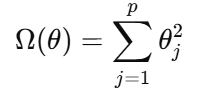

* 각 가중치의 제곱합을 최소화
* 모델이 모든 특성에 대해 작지만 고르게 분산된 가중치를 갖도록 유도

In [154]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [155]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [156]:
lasso.score(test_scaled, test_target)

0.9800593698421884

* 릿지와 라쏘 모델을 사용할 때 규제의 양을 사용자 임의로 조정 가능
* 모델 객체 생성시 **alpha 매개변수 값 변경**
  - alpha 값 증가 : 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
  - alpha 값 감소 : 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성 증가

#### [적절한 alpha 값 찾기]

In [159]:
import matplotlib.pyplot as plt
train_score =[]
test_score = []

alpha_list = [0.001, 0.01, 0.1 ,1, 10, 100]
for al in alpha_list:
    ridge = Ridge(alpha=al)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

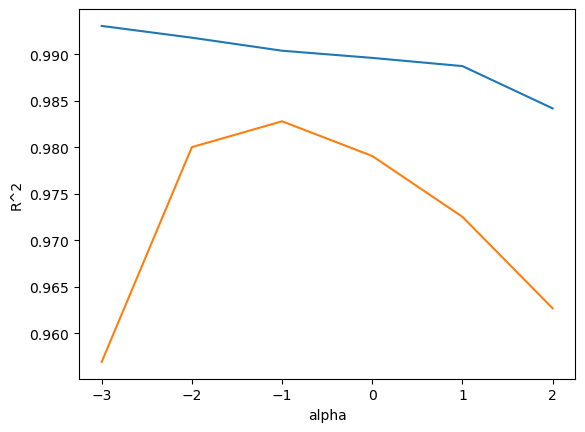

In [160]:
# plt.plot(alpha_list, train_score)
# plt.plot(alpha_list, test_score)
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 적절한 alpha 값은?
  - 훈련 세트 그래프와 테스트 세트 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 alpha 값 선택

In [162]:
ridge = Ridge(alpha =0.1)
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9903815817570367

In [163]:
ridge.score(test_scaled, test_target)

0.9827976465387017

### 라쏘 회귀(Lasso Regression)
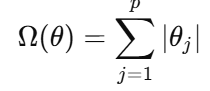

* 각 가중치의 절댓값 합을 최소화
* 일부 가중치를 0으로 만들기 때문에 **특성 선택(feature selection) 역할** 도 가능

In [209]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [166]:
lasso.score(test_scaled, test_target)

0.9819405116249365

#### [적절한 alpha 값 찾기]

In [221]:
train_score =[]
test_score = []
alpha_list = [0.001, 0.01, 0.1 ,1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter= 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


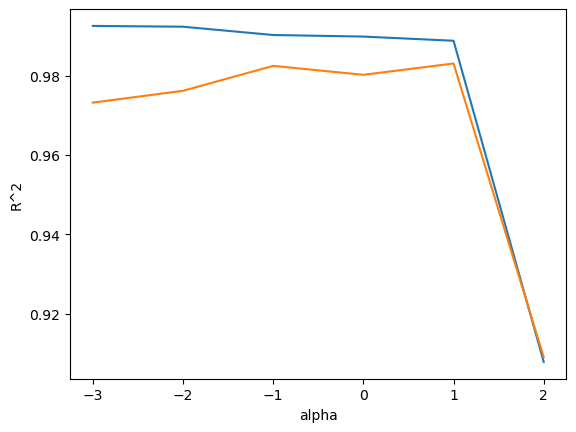

In [223]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [225]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [229]:
np.sum(lasso.coef_==0)


40

In [237]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

* 라쏘 모델을 통해 0으로 만들어진 계수 확인